C:\Users\sseie\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


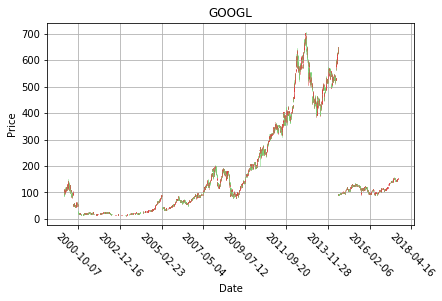

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):

    ts = TimeSeries(key='QBGZM8IV1P2X2VJQ', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=stock, interval='60min', outputsize='compact')
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)


    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(315)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('GOOGL')

In [73]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime

df = web.get_data_yahoo("aapl", 'google')

trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
layout = go.Layout(title='A Simple Plot', width=800, height=640)
fig = go.Figure(data=data, layout=layout)

py.image.save_as(fig, filename='candle_testing.png')

from IPython.display import Image
Image('candle_testing.png')

RemoteDataError: Unable to read URL: http://www.google.com/finance/historical?q=aapl&startdate=Jan+01%2C+2010&enddate=Jan+03%2C+2018&output=csv

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from alpha_vantage.timeseries import TimeSeries

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):

    ts = TimeSeries(key='QBGZM8IV1P2X2VJQ', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=stock, interval='60min', outputsize='compact')
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%M-%d %H:%M:%S')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(315)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d %H:%M:%S'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('GOOGL')

C:\Users\sseie\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



error: redefinition of group name 'M' as group 5; was group 2 at position 107

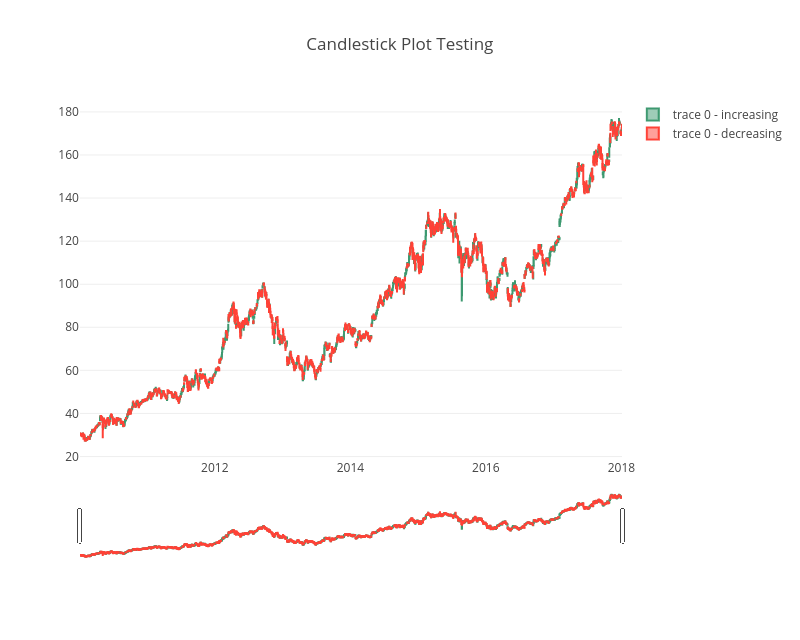

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas_datareader.data as web
from datetime import datetime

import pandas_datareader as pdr
df = web.get_data_yahoo('AAPL')


trace = go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)
data = [trace]
layout = go.Layout(title='Candlestick Plot Testing', width=800, height=640)
fig = go.Figure(data=data, layout=layout)

py.image.save_as(fig, filename='candle_testing.png')

from IPython.display import Image
Image('candle_testing.png')

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt



def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):

    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    ts = TimeSeries(key='QBGZM8IV1P2X2VJQ', output_format='pandas')
    rawdata, meta_data = ts.get_intraday(symbol="GOOGL", interval='60min', outputsize='compact')
    
    df.to_csv(rawdata, sep='\t')
    
    stock_data = []
    split_source = df
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, openp, highp, lowp, closep, volume = np.genfromtxt(df,
                                                             delimiter=',',
                                                             unpack=True,converters={0: bytespdate2num('%Y-%m-%d')})
    
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(315)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('GOOGL')

TypeError: 'Series' object is not callable

In [52]:
from pandas_datareader.data import get_data_yahoo
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from matplotlib.finance import candlestick_ohlc
import datetime as dt
symbol = "GOOG"

data = get_data_yahoo(symbol, start = '2014-9-01', end = '2015-10-23')
data.reset_index(inplace=True)
data['Date']=mdates.date2num(data['Date'].astype(dt.date))
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
ax1.xaxis.set_major_locator(mticker.MaxNLocator(6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

candlestick_ohlc(ax1,data.values,width=0.2)

C:\Users\sseie\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



([<matplotlib.lines.Line2D at 0x2bf9b1056d8>,
  <matplotlib.patches.Rectangle at 0x2bf9b8b95c0>])

In [54]:
# Imports
from pandas_datareader.data import get_data_yahoo
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.pyplot import subplots, draw
from matplotlib.finance import candlestick
import matplotlib.pyplot as plt

# get the data on a symbol (gets last 1 year)
symbol = "TSLA"
data = get_data_yahoo(symbol, datetime.now() - timedelta(days=365))

# drop the date index from the dateframe
data.reset_index(inplace = True)

# convert the datetime64 column in the dataframe to 'float days'
data.Date = mdates.date2num(data.Date)

# make an array of tuples in the specific order needed
dataAr = [tuple(x) for x in data[['Date', 'Open', 'Close', 'High', 'Low']].to_records(index=False)]

# construct and show the plot
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
candlestick(ax1, dataAr)
plt.show()

ImportError: cannot import name 'candlestick'

In [71]:
import io
from math import pi
import pandas as pd
from bokeh.plotting import figure, show, output_file

ts = TimeSeries(key='QBGZM8IV1P2X2VJQ', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

rawdata.to_csv('dataframe.csv')

df = pd.read_csv(
    'dataframe.csv'
)

df["Date"] = pd.to_datetime(df["Date"])

inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title
= "Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.Date, df.high, df.Date, df.low, color="black")
p.vbar(df.Date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.Date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)

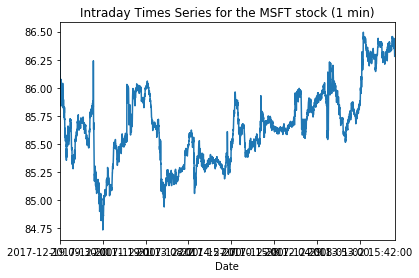

In [68]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='QBGZM8IV1P2X2VJQ', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

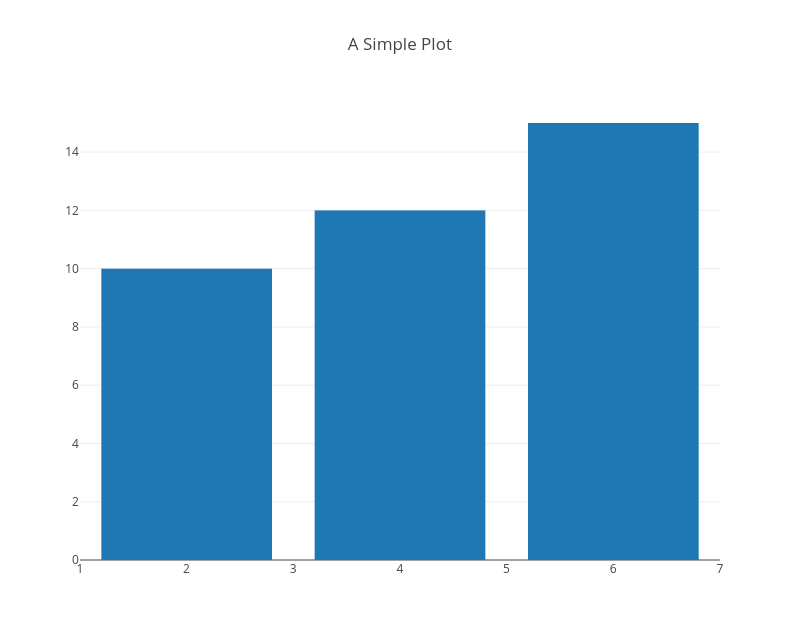

In [72]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('DemoAccount', '2qdyfjyr7o') # Replace the username, and API key with your credentials.

trace = go.Bar(x=[2, 4, 6], y= [10, 12, 15])
data = [trace]
layout = go.Layout(title='A Simple Plot', width=800, height=640)
fig = go.Figure(data=data, layout=layout)

py.image.save_as(fig, filename='a-simple-plot.png')

